In [1]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Pandas
import pandas as pd

### fitting
import statsmodels.api as sm

### PCA
from sklearn.decomposition import PCA, KernelPCA

### Model generation
import itertools as it

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18}) #make plots more readable

# ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
import MagellanicStream as ms

# ### Functions used in this code
import age_functions as afunc

### Stuff Writtten by A Really Cool Professor
# import dlnpyutils as dlpu

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

### Age of Universe
H0 = 74.03*(u.km/u.s)/u.Mpc
hertz = H0.to(u.km/u.s/u.pc).to(u.km/u.s/u.km)
tage = (1/hertz).to(u.yr)
ageU = tage.value

In [2]:
# plt.hist(np.log10(parsec['Z']/0.02))

In [3]:
pwd

'/Users/joshuapovick/Desktop/Research/LMC_Ages/Polynomial_LMC_Ages'

In [128]:
###################
### Import Data ###
###################

# parsec
''' Ages used 8 to 10.1 steps 0.15'''
# ''' Metallicity used -2.6 to 0.1 steps 0.099'''

parsec = ascii.read('/Users/joshuapovick/Desktop/Research/parsec/parsec3_3.dat',format='basic',delimiter='\s')
# parsec = Table.from_pandas(parsec)
# parsec = fits.getdata('/Users/joshuapovick/Desktop/Research/parsec/parsec_massive.fits.gz')
rgb = np.where(parsec['label']==3)
parsec = parsec[rgb]


# # r13
# r13 = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.r13-l33-58672.fits.gz')
# cln = np.where((r13['FE_H']>-9999.0)&(r13['AK_TARG']>-100.0)&(r13['LOGG']>=0.0)&
#                 (r13['M_H_ERR']>-100.0)&(r13['C_FE']>-100.0)&(r13['N_FE']>-100.0))
# r13 = r13[cln]

lmc = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.dr17_qacuts.fits.gz',1)
cln = np.where((lmc['FE_H']>-9999.0)&(lmc['AK_TARG']>-9999.0)&(lmc['LOGG']>0.0)&
                (lmc['M_H_ERR']>-90.0)&(lmc['C_FE']>-9999.0)&(lmc['N_FE']>-9999.0))

lmc = lmc[cln]
lmc = Table(lmc)

# APOKASC
# kasc = fits.getdata('/Users/joshpovick/Desktop/Research/LMC_Ages/APOKASC_cat_v6.6.1.fits.gz')

# # Diane Feuillet
# pdfout = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/LMC_DR16_all_PDF.fits.gz', 1)
# _, r13_ind, pdfout_ind = np.intersect1d(r13['APOGEE_ID'],pdfout['OBJ'],return_indices=True)

In [129]:
lmc.columns

<TableColumns names=('FILE','APOGEE_ID','TARGET_ID','APSTAR_ID','ASPCAP_ID','TELESCOPE','LOCATION_ID','FIELD','ALT_ID','RA','DEC','GLON','GLAT','J','J_ERR','H','H_ERR','K','K_ERR','SRC_H','WASH_M','WASH_M_ERR','WASH_T2','WASH_T2_ERR','DDO51','DDO51_ERR','IRAC_3_6','IRAC_3_6_ERR','IRAC_4_5','IRAC_4_5_ERR','IRAC_5_8','IRAC_5_8_ERR','IRAC_8_0','IRAC_8_0_ERR','WISE_4_5','WISE_4_5_ERR','TARG_4_5','TARG_4_5_ERR','WASH_DDO51_GIANT_FLAG','WASH_DDO51_STAR_FLAG','TARG_PMRA','TARG_PMDEC','TARG_PM_SRC','AK_TARG','AK_TARG_METHOD','AK_WISE','SFD_EBV','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE2_TARGET1','APOGEE2_TARGET2','APOGEE2_TARGET3','APOGEE2_TARGET4','TARGFLAGS','SURVEY','PROGRAMNAME','NVISITS','SNR','SNREV','STARFLAG','STARFLAGS','ANDFLAG','ANDFLAGS','VHELIO_AVG','VSCATTER','VERR','RV_TEFF','RV_LOGG','RV_FEH','RV_ALPHA','RV_CARB','RV_CHI2','RV_CCFWHM','RV_AUTOFWHM','RV_FLAG','N_COMPONENTS','MEANFIB','SIGFIB','MIN_H','MAX_H','MIN_JK','MAX_JK','GAIAEDR3_SOURCE_ID','GAIAEDR3_PARALLAX','GAIAEDR3_PA

-2.6:  5.023772863019159e-05
min:  9.5770134e-05
max:  0.0139739765


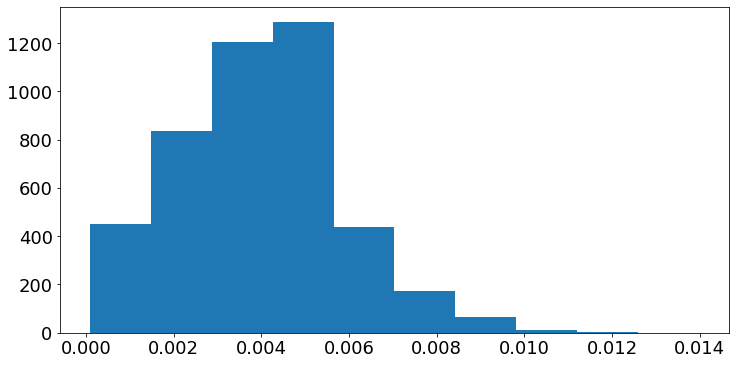

In [53]:
z = 0.02*10**lmc['FE_H']
plt.hist(z)
print('-2.6: ',0.02*10**-2.6)
print('min: ',min(z))
print('max: ',max(z))

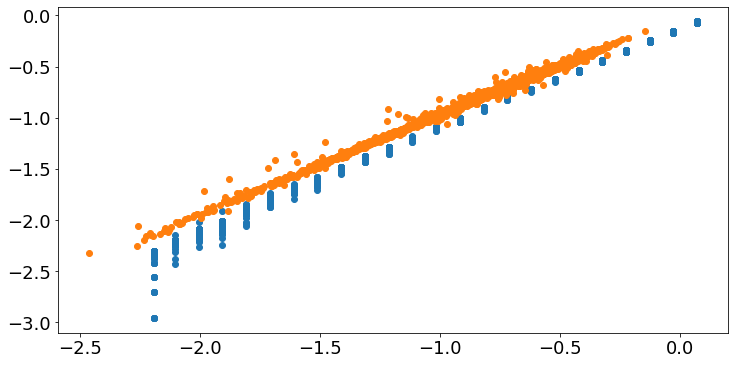

In [54]:
plt.scatter(parsec['MH'],np.log10(parsec['Z']/0.02))
plt.scatter(lmc['M_H'],lmc['FE_H'])

In [55]:
lmc.columns

<TableColumns names=('FILE','APOGEE_ID','TARGET_ID','APSTAR_ID','ASPCAP_ID','TELESCOPE','LOCATION_ID','FIELD','ALT_ID','RA','DEC','GLON','GLAT','J','J_ERR','H','H_ERR','K','K_ERR','SRC_H','WASH_M','WASH_M_ERR','WASH_T2','WASH_T2_ERR','DDO51','DDO51_ERR','IRAC_3_6','IRAC_3_6_ERR','IRAC_4_5','IRAC_4_5_ERR','IRAC_5_8','IRAC_5_8_ERR','IRAC_8_0','IRAC_8_0_ERR','WISE_4_5','WISE_4_5_ERR','TARG_4_5','TARG_4_5_ERR','WASH_DDO51_GIANT_FLAG','WASH_DDO51_STAR_FLAG','TARG_PMRA','TARG_PMDEC','TARG_PM_SRC','AK_TARG','AK_TARG_METHOD','AK_WISE','SFD_EBV','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE2_TARGET1','APOGEE2_TARGET2','APOGEE2_TARGET3','APOGEE2_TARGET4','TARGFLAGS','SURVEY','PROGRAMNAME','NVISITS','SNR','SNREV','STARFLAG','STARFLAGS','ANDFLAG','ANDFLAGS','VHELIO_AVG','VSCATTER','VERR','RV_TEFF','RV_LOGG','RV_FEH','RV_ALPHA','RV_CARB','RV_CHI2','RV_CCFWHM','RV_AUTOFWHM','RV_FLAG','N_COMPONENTS','MEANFIB','SIGFIB','MIN_H','MAX_H','MIN_JK','MAX_JK','GAIAEDR3_SOURCE_ID','GAIAEDR3_PARALLAX','GAIAEDR3_PA

0.0145858405
0.0019253716


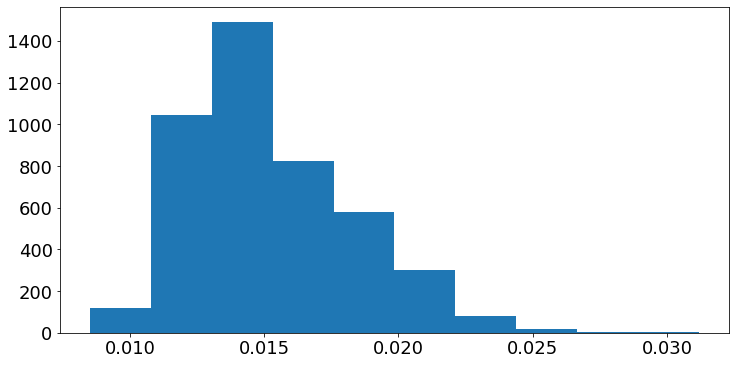

In [56]:
plt.hist(lmc['FE_H_ERR'])
print(np.median(lmc['FE_H_ERR']))
print(afunc.mad(lmc['FE_H_ERR']))
# afunc.mad(lmc['Fe_H_ERR'])

-0.71834


0.13885003

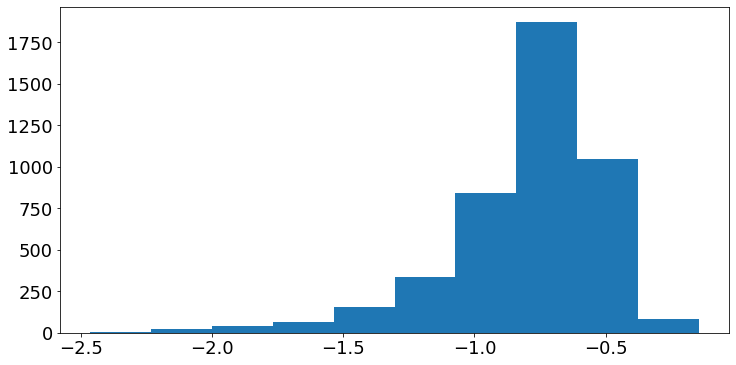

In [57]:
plt.hist(lmc['M_H'])
print(np.nanmedian(lmc['M_H']))
afunc.mad(lmc['M_H'])

0.012306105


0.0017617447

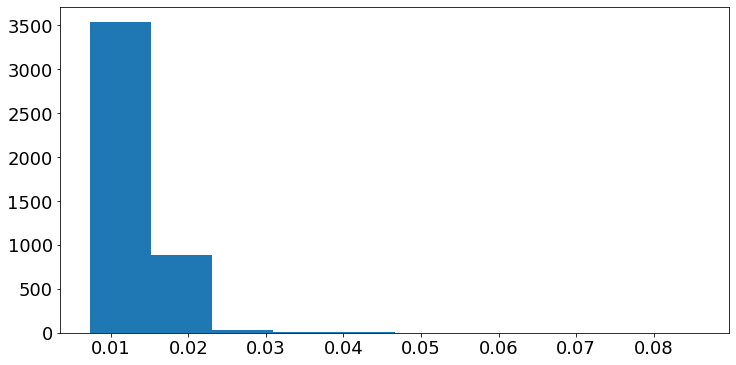

In [58]:
plt.hist(lmc['M_H_ERR'])
print(np.median(lmc['M_H_ERR']))
afunc.mad(lmc['M_H_ERR'])

In [59]:
len(np.arange(-2.5,-0.2,0.02))

115

In [60]:
min(lmc['FE_H'])

-2.3198

(array([  10.,   12., 3167.,  957., 1456., 1497., 1627., 1781., 1990.,
        2449.]),
 array([-2.95703093, -2.66725129, -2.37747165, -2.08769202, -1.79791238,
        -1.50813275, -1.21835311, -0.92857347, -0.63879384, -0.3490142 ,
        -0.05923456]),
 <a list of 10 Patch objects>)

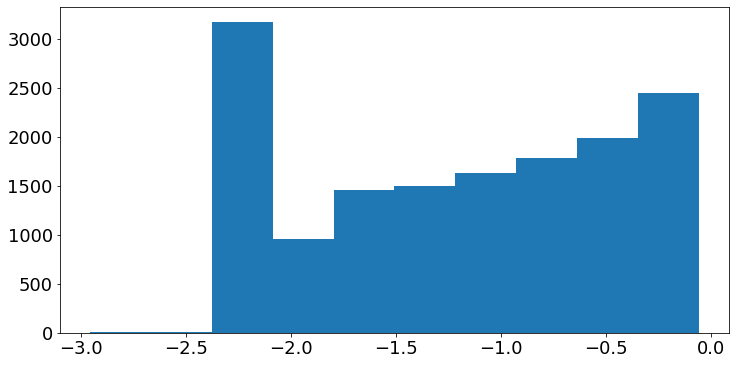

In [61]:
plt.hist(np.log10(parsec['Z']/0.02))

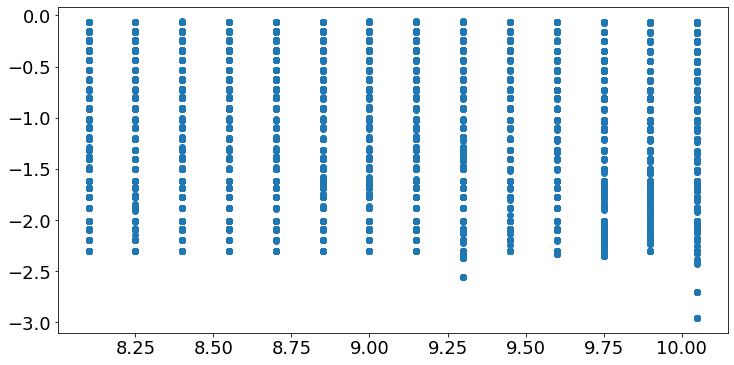

In [62]:
plt.scatter(parsec['logAge'],np.log10(parsec['Z']/0.02))

In [63]:
np.where(lmc['FE_H']<-2.2)

(array([1641, 2760]),)

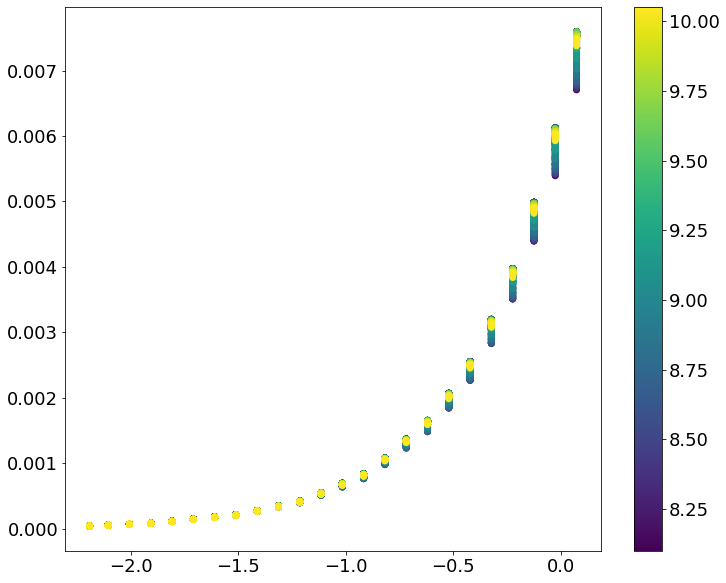

In [64]:
plt.figure(figsize=[12,10])
plt.scatter(parsec['MH'],parsec['Xo'],c=parsec['logAge'])
plt.colorbar()

In [130]:
###############################
### Some Calcuations Needed ###
###############################

### Convert RA DEC to MS L B
c_icrs = SkyCoord(ra=lmc['RA']*u.degree, dec=lmc['DEC']*u.degree)
c_ms = c_icrs.transform_to(ms.MagellanicStream)
ms_lg,ms_bg = c_ms.MSLongitude.degree, c_ms.MSLatitude.degree

for i in range(len(ms_lg)):
    if ms_lg[i]-360<-180:
        ms_lg[i] += 360.0

### Get Solar Fractions
abd = {'C':8.39,'N':7.78,'O':8.66,'Mg':7.53,'Ca':6.31,'S':7.14,'Si':7.51,'Fe':7.45}
keys = list(abd.keys())

sol_2_H = []
for i in keys:
    sol_2_H.append(abd[i]-12.0)
    
sol_xm  = 10**np.asarray(sol_2_H)/sum(10**np.asarray(sol_2_H))

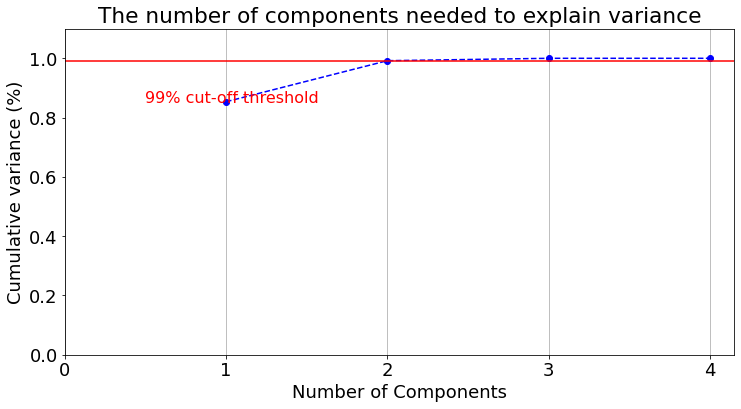

In [131]:
### Setup 
data = np.array([parsec['logTe'],parsec['Ksmag'],parsec['MH'],parsec['logg']]).T

### Determine Number of factors
pca = PCA(n_components=4).fit(data)#_rescaled)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(pca.explained_variance_ratio_)+1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [132]:
### Find all models

#transform data to new basis
new_data = PCA(n_components=3).fit(data).transform(data)

#create new variables

# linear terms
x1 = new_data[:,0]
x2 = new_data[:,1]
x3 = new_data[:,2]

# linear int
x12 = np.multiply(x1,x2)
x13 = np.multiply(x1,x3)
x23 = np.multiply(x2,x3)

# squares
x1sq = x1**2
x2sq = x2**2
x3sq = x3**2

# cubes
x1cu = x1**3
x2cu = x2**3
x3cu = x3**3


#find all possible models
models = []
models_str = []

all_var_str = ['x1','x2','x3','x12','x13','x23','x1sq','x2sq','x3sq','x1cu','x2cu','x3cu']
all_var = [x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]

for i in range(1,len(all_var)+1):
    for subset in it.combinations(all_var,i):
        models.append(subset)
    for subset_str in it.combinations(all_var_str,i):
        models_str.append(np.array(subset_str))
        
models = np.array(models)
models_str = np.array(models_str)

### Fit All Models

import statsmodels.api as sm 

all_params = []
summaries = []
max_resid = []
mads = []
resids = []
predict = []
ll = []
for i in tqdm_notebook(range(len(models)),desc='Done?'):
    pmodl = np.array(models[i]).T
    pmodl = sm.add_constant(pmodl)
    model = sm.OLS(parsec['logAge'],pmodl).fit()
    summaries.append(model.summary())
    predictions = model.predict(pmodl)
    predict.append(predictions)
    residual = predictions - parsec['logAge']
    resids.append(residual)
    all_params.append(np.asarray(model.params))
    max_resid.append(np.max(np.absolute(residual)))
    mads.append(afunc.mad(residual))
    ll.append(model.llf)

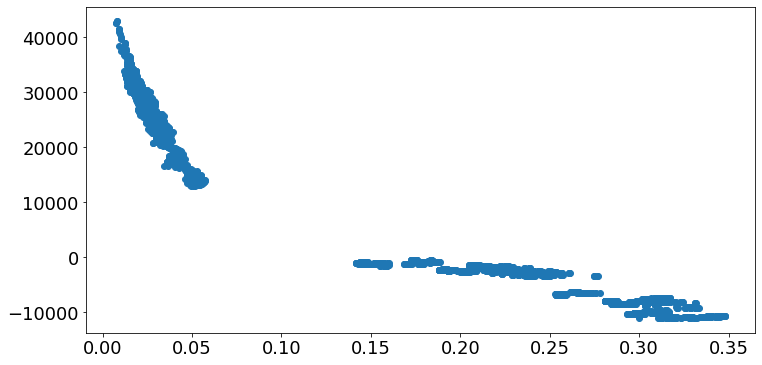

In [133]:
plt.scatter(mads,ll)

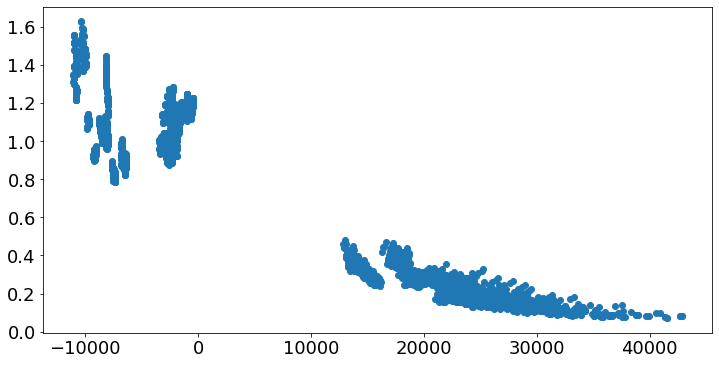

In [134]:
plt.scatter(ll,max_resid)

In [135]:
# models_str[np.asarray(max_resid).argmin()]

In [136]:
models_str[np.asarray(mads).argmin()]

array(['x1', 'x2', 'x3', 'x12', 'x13', 'x23', 'x1sq', 'x2sq', 'x3sq',
       'x1cu', 'x2cu'], dtype='<U4')

In [137]:
models_str[np.asarray(ll).argmax()]

array(['x1', 'x2', 'x3', 'x12', 'x13', 'x23', 'x1sq', 'x2sq', 'x3sq',
       'x1cu', 'x2cu', 'x3cu'], dtype='<U4')

In [138]:
models_str[np.asarray(max_resid).argmin()]

array(['x1', 'x2', 'x3', 'x12', 'x13', 'x23', 'x1sq', 'x2sq', 'x3sq',
       'x1cu', 'x3cu'], dtype='<U4')

In [139]:
# parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]).T
# parsimonious = sm.add_constant(parsimonious)
# parsimonious_model = sm.OLS(parsec['logAge'],parsimonious).fit()
# parsimonious_predictions = parsimonious_model.predict(parsimonious)
# parsimonious_residual = parsimonious_predictions - parsec['logAge']
# print(afunc.mad(parsimonious_residual))
# parsimonious_summary = parsimonious_model.summary()
# print(parsimonious_summary)
# print(np.asarray(parsimonious_model.params))
# # print(models_str[np.asarray(ll).argmax()])

In [140]:
parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu]).T
parsimonious = sm.add_constant(parsimonious)
parsimonious_model = sm.OLS(parsec['logAge'],parsimonious).fit()
parsimonious_predictions = parsimonious_model.predict(parsimonious)
parsimonious_residual = parsimonious_predictions - parsec['logAge']
print(afunc.mad(parsimonious_residual))
parsimonious_summary = parsimonious_model.summary()
print(parsimonious_summary)
print(np.asarray(parsimonious_model.params))
print(models_str[np.asarray(ll).argmax()])

0.007904882569693683
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.692e+06
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                 42862.
No. Observations:               14946   AIC:                        -8.570e+04
Df Residuals:                   14933   BIC:                        -8.560e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3863      0.00

In [141]:
parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu]).T
parsimonious = sm.add_constant(parsimonious)
parsimonious_model = sm.OLS(parsec['logAge'],parsimonious).fit()
parsimonious_predictions = parsimonious_model.predict(parsimonious)
parsimonious_residual = parsimonious_predictions - parsec['logAge']
print(afunc.mad(parsimonious_residual))
parsimonious_summary = parsimonious_model.summary()
print(parsimonious_summary)
print(np.asarray(parsimonious_model.params))
# print(models_str[np.asarray(ll).argmax()])

0.007896514050076853
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.846e+06
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                 42862.
No. Observations:               14946   AIC:                        -8.570e+04
Df Residuals:                   14934   BIC:                        -8.561e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3863      0.00

In [142]:
# ### Final Age Model

# def find_ages(z1,z2,z3):
#     # all of them NO
# #     p=[ 9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,
# #        -4.49811350e-02,1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,
# #        6.91983807e-06,2.26647606e-02,4.02013915e-01]
# #     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+
# #             p[6]*np.multiply(z2,z3)+p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z1**3)+
# #             p[11]*(z2**3)+p[12]*(z3**3))

#     # 'x1' 'x2' 'x3' 'x12' 'x13' 'x23' 'x1sq' 'x2sq' 'x3sq' 'x2cu' 'x3cu'
#     p = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
#          1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
#     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+
#             p[6]*np.multiply(z2,z3)+p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3)+p[11]*(z3**3))
#     return ages


In [143]:
# l Age Model

# def find_ages(z1,z2,z3):
#     p = [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,
#          1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]
    
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*np.square(z1)+p[8]*np.square(z2)+p[9]*np.square(z3)+p[10]*(z3**3))
#     p=[9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,1.10591414e-01
#        ,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age=(p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#          p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)) 
#     p = [ 9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(x1,x2)+p[5]*np.multiply(x1,x3)+p[6]*np.multiply(x2,x3)+
#            p[7]*(x1**2)+p[8]*(x2**2)+p[9]*(x3**2))
#     p = [9.38635341e+00,4.94863782e-02,-5.88867291e-02,-3.03646050e+00,1.83469126e-02,1.21122776e-01,
#          -6.14563208e-03,2.49234846e-02,6.83924894e-01,2.21039907e-02,1.37377932e+00]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z2**3)+p[10]*(z3**3))
    
    
    #MAYBE 
#     p = [9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,-4.49811350e-02,
#          1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,6.91983807e-06,2.26647606e-02,
#          4.02013915e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z1**3)+p[11]*(z2**3)+p[12]*(z3**3))
    
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x3cu diane good grads bad
#     p = [9.38515897e+00,4.58688521e-02,-3.84792679e-02,-2.99646858e+00,1.86803888e-02,-4.45192811e-02,
#          1.11622297e-01,-5.92301837e-03,2.69971879e-02,7.92882358e-01,4.19685455e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z3**3))
    
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq
#     p = [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2))
    
    # x1,x2,x3,x12,x13,x23,x1sq,x3sq
#     p = [9.39959662e+00,4.52035924e-02,-3.93931497e-02,-2.96912442e+00,1.93135473e-02,-5.27122256e-02,
#          1.11865508e-01,-5.76302442e-03,8.61921873e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z3**2))
    
#     #x1,x2,x3,x12,x1sq,x3sq
#     p = [9.39780792e+00,5.02485864e-02,-3.99480944e-02,-2.92632823e+00,1.99585372e-02,-6.25818591e-03,
#          9.68403231e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*(z1**2)+p[6]*(z3**2))
#     return age

In [144]:
# def find_ages(z1,z2,z3):
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq
#     p = [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2))
    
#     #x1,x2,x3,x12,x13,x23,x1sq,x3sq
#     p = [9.39959662e+00,4.52035924e-02,-3.93931497e-02,-2.96912442e+00,1.93135473e-02,-5.27122256e-02,
#          1.11865508e-01,-5.76302442e-03,8.61921873e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z3**2))
#     p = [9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,-4.49811350e-02,
#           1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,6.91983807e-06,2.26647606e-02,
#           4.02013915e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z1**3)+p[11]*(z2**3)+p[12]*(z3**3))
#     return age

#     p = [9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,-4.49811350e-02,
#          1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,6.91983807e-06,2.26647606e-02,
#          4.02013915e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z1**3)+p[11]*(z2**3)+p[12]*(z3**3))
#     return age

In [145]:
# def find_ages(z1,z2,z3):
#     # all but cubes
#     p = [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#             p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2))
#     return ages

In [146]:
# [ 9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,
#        -4.49811350e-02,1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,
#        6.91983807e-06,2.26647606e-02,4.02013915e-01] == [9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,-4.49811350e-02,
#          1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,6.91983807e-06,2.26647606e-02,
#          4.02013915e-01]

In [147]:
print(models_str[np.asarray(ll).argmax()])

['x1' 'x2' 'x3' 'x12' 'x13' 'x23' 'x1sq' 'x2sq' 'x3sq' 'x1cu' 'x2cu'
 'x3cu']


In [148]:
# parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu]).T
parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu]).T

In [149]:
# parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq]).T#,x2cu]).T
# parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu]).T
# parsimonious = np.array([x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu]).T
parsimonious = sm.add_constant(parsimonious)
parsimonious_model = sm.OLS(parsec['logAge'],parsimonious).fit()
parsimonious_predictions = parsimonious_model.predict(parsimonious)
parsimonious_residual = parsimonious_predictions - parsec['logAge']
print(afunc.mad(parsimonious_residual))
parsimonious_summary = parsimonious_model.summary()
print(parsimonious_summary)
print(np.asarray(parsimonious_model.params))
# print(models_str[np.asarray(ll).argmax()])

0.007896514050076853
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.846e+06
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                 42862.
No. Observations:               14946   AIC:                        -8.570e+04
Df Residuals:                   14934   BIC:                        -8.561e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3863      0.00

In [150]:
# [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,1.09839708e-01,
# -5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]==[9.38559303e+00,4.50640684e-02,-6.04245546e-02,
# -2.97525149e+00,1.89919586e-02,-5.42190398e-02,1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,
# 2.28289124e-02]

# [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,1.10591414e-01,
# -5.87621144e-03,2.69613674e-02,8.71979746e-01] == [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,
# 1.89942809e-02 -5.40460673e-02,1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]

In [151]:
[9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]==[9.38631710e+00,
    4.57009017e-02, -5.98198867e-02, -2.99642242e+00,
  1.86921027e-02, -4.51165023e-02,  1.10829968e-01, -5.93377185e-03,
  2.51457473e-02,  7.98522275e-01,  2.26643514e-02,  4.00941011e-01]

True

In [152]:


def find_ages(z1,z2,z3):
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x1cu,x2cu,x3cu
#     p = [9.38632004e+00,4.56560132e-02,-5.98144381e-02,-2.99645418e+00,1.86773433e-02,-4.49811350e-02,
#          1.10821907e-01,-5.93635093e-03,2.51466115e-02,7.98516719e-01,6.91983807e-06,2.26647606e-02,
#          4.02013915e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z1**3)+p[11]*(z2**3)+p[12]*(z3**3))
    
    #Very Close
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu
#     p = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
#          1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3)+p[11]*(z3**3))
    
    #good good
#     x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu
#     p = [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,
#          1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3))
    
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu
    p = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
         1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
    age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
           p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3)+p[11]*(z3**3))
    
    
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq
#     p = [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2))
    
#     #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq
#     p = [9.38439200e+00,4.52032966e-02,-3.89501708e-02,-2.97430070e+00,1.89942809e-02,-5.40460673e-02,
#          1.10591414e-01,-5.87621144e-03,2.69613674e-02,8.71979746e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2))
    
#     #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu
#     p = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
#          1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z2**2)+p[8]*(z3**2))

    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu
#     p = [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,
#          1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2))
    
#     p = [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,
#          1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z2**2))
    return age


In [153]:
a = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,1.10829968e-01,
 -5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
b = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
          1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]

a==b

True

<font size='48'>
    <b>
        CALCULATE AGES
    </b>
</font>

In [154]:
### Uncertainty Functions

def add_noise(quant,quant_err,distribution='normal'):
    '''
    Add noise to data and return new values
    
    Parameters:
    ----------
        quant: 1d array-like data to add noise to
        quant_err: 1d array-like object of errors for quant
        distribution: which distribution to use 'normal', 'poisson', 'uniform'
    
    return: 
    ------
        1d array-like object of data with added noise
    
    '''
    if distribution == 'normal':
        return np.random.normal(quant,quant_err)
    if distribution == 'poisson':
        return quant + np.random.poisson(quant_err)
    if distribution == 'uniform':
        return np.random.uniform(-quant_err+quant,quant+quant_err)

In [155]:
age_dist = []

pca_transform = PCA(n_components=3).fit(data)

for i in tqdm_notebook(range(len(lmc)),desc='Done?'):
    try:
        # temperature
        teff = lmc['TEFF'][i]
        teff_err = lmc['TEFF_ERR'][i]
    
        # photometry 
        ra = lmc['RA'][i]
        dec = lmc['DEC'][i]
        ks = lmc['K'][i]
        ks_err = lmc['K_ERR'][i]
        ak = lmc['AK_TARG'][i]
    
        # abundances
        mh = lmc['M_H'][i]
        mh_err = lmc['M_H_ERR'][i]
        cfe = lmc['C_FE'][i]
        cfe_err = lmc['C_FE_ERR'][i]
        nfe = lmc['N_FE'][i]
        nfe_err = lmc['N_FE_ERR'][i]
        feh = lmc['FE_H'][i]
        feh_err = lmc['FE_H_ERR'][i]
    
        # surface gravity
        lgg = lmc['LOGG'][i]
        lgg_err = lmc['LOGG_ERR'][i]
    
        noise_ages = []
        new = []
        for j in range(750):
       
            # calculate noisy temperature
            teff_new = add_noise(teff,teff_err)
            lgteff_new = np.log10(teff_new)
    
            # Calculate noisy K magnitude
            _, _, dist = afunc.LMCdisk_cart(ra,dec)
        
            ks_new = add_noise(ks,ks_err)
            
            absK_new = afunc.absmag(ks_new,dist) - ak
            
            # Calculate noisy Salaris correction
        
            x_C_new = sol_xm[0]*10**(add_noise(cfe,cfe_err)+
                                 add_noise(feh,feh_err)-add_noise(mh,mh_err))
            x_N_new = sol_xm[1]*10**(add_noise(nfe,nfe_err)+
                                 add_noise(feh,feh_err)-add_noise(mh,mh_err))
        
            ffac_new = (x_C_new+x_N_new)/sum(sol_xm[0:2])
        
            mh_new = add_noise(mh,mh_err)
        
            # Calculate noisy surface gravity
            lgg_new = add_noise(lgg,lgg_err)
            
            # calculate noisy age
            new.append(np.array([lgteff_new,absK_new,afunc.sal(mh_new,ffac_new),lgg_new]))
        
        zs = pca_transform.transform(np.asarray(np.squeeze(new)))

        for l in range(len(zs)):
            noise_ages.append(find_ages(zs[l][0],zs[l][1],zs[l][2]))
    
        age_dist.append(noise_ages)
    
    except:
        age_dist.append(-9999.0*np.ones(750))
        
parages = [] 
devs = []
for k in tqdm_notebook(range(len(age_dist))):
    devs.append(afunc.mad(age_dist[k]))
    parages.append(np.median(age_dist[k]))

In [156]:
def bloopjkk(color):
    '''
    Function to calculate bloop boundary in J-K K space
    
    Input:
    -----
        color: J-K color
        
    Output:
    ------
        Value of cut
    '''
    x=color
    return np.piecewise(x,[x<=0.876,x>0.876],[lambda x: 12.75, lambda x: -5.372*x+17.46])

bplt.figure(figsize=[12,10])
# plt.scatter(10**np.asarray(parages)[r13_ind],10**pdfout['P_MEAN'][pdfout_ind],c=r13['LOGG'][r13_ind],
#                 marker='+',cmap='nipy_spectral')
# plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
# plt.plot(10**np.array([7,8,9,10,11,12,13]),10**np.array([7,8,9,10,11,12,13]),c='k')
# plt.ylim(10**7,10**11)
# plt.xlim(10**7,10**13)

# plt.xlabel(r'Polynomial Interpolation')
# plt.ylabel(r'Bayesian')loop_feh = np.where((lmc['K']>bloopjkk(lmc['J']-lmc['K']))&(lmc['FE_H']>=-0.5))

NameError: name 'bplt' is not defined

In [ ]:
plt.figure(figsize=[12,10])
plt.scatter(lmc['J']-lmc['K'],lmc['K'],c='k')
plt.scatter((lmc['J']-lmc['K'])[bloop_feh],lmc['K'][bloop_feh],c='r')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(np.median((10**np.asarray(parages)[bloop_feh])/10**9))
print(afunc.mad((10**np.asarray(parages)[bloop_feh])/10**9))

In [ ]:
1.3703353648313084+0.6364430105045743

In [ ]:
np.median((10**np.asarray(parages)[np.where(lmc['FE_H']>=-0.5)])/10**9)

In [ ]:
afunc.mad((10**np.asarray(parages)[np.where(lmc['FE_H']>=-0.5)])/10**9)

In [ ]:
np.median((10**np.asarray(parages)[np.where(lmc['FE_H']>-0.5)])/10**9)+afunc.mad((10**np.asarray(parages)[np.where(lmc['FE_H']>-0.5)])/10**9)

In [ ]:
10**np.median(np.asarray(parages)[np.where(lmc['FE_H']>=-0.5)])/10**9

In [ ]:
print(np.where(parages<=np.log10(0.5*10**9)))
print(np.log10(0.5*10**9))
plt.hist(parages,range=(8,12))
plt.xlabel('LogAge')

In [ ]:
# plt.figure(figsize=[12,10])
# plt.scatter(10**np.asarray(parages)[r13_ind],10**pdfout['P_MEAN'][pdfout_ind],c=r13['LOGG'][r13_ind],
#                 marker='+',cmap='nipy_spectral')
# plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
# plt.plot(10**np.array([7,8,9,10,11,12,13]),10**np.array([7,8,9,10,11,12,13]),c='k')
# plt.ylim(10**7,10**11)
# plt.xlim(10**7,10**13)

# plt.xlabel(r'Polynomial Interpolation')
# plt.ylabel(r'Bayesian')

In [ ]:
# plt.hist(10**pdfout['P_MEAN'][pdfout_ind])

In [ ]:
# plt.hist(10**np.asarray(parages)[r13_ind])

In [123]:
# plt.hist(age_dist[100])

In [160]:
cat = Table()
col_id = Column(np.asarray(lmc['APOGEE_ID']),name='APOGEE_ID')
col_age = Column(np.asarray(parages),name='AGE')
col_dev = Column(np.asarray(devs),name='AGE_ERR')
col_dist = Column(np.asarray(age_dist),name='DIST')

cat.add_column(col_id)
cat.add_column(col_age)
cat.add_column(col_dev)
cat.add_column(col_dist)

cat.write('TEST_pca_ols_agesDR17.fits',format='fits')#,overwrite=True)
# cat.write('TEST_pca_ols_ll.fits',format='fits',overwrite=True)

In [158]:
len(cat)

4465

In [36]:
# ### Find all models

# #transform data to new basis
# # new_data = PCA(n_components=3).fit(data).transform(data)

# #create new variables

# # linear terms
# x1 = parsec['logTe'] #new_data[:,0]
# x2 = parsec['Ksmag'] #new_data[:,1]
# x3 = parsec['MH'] #new_data[:,2]
# x4 = parsec['logg']

# # linear int
# x12 = np.multiply(x1,x2)
# x13 = np.multiply(x1,x3)
# x14 = np.multiply(x1,x4)

# x23 = np.multiply(x2,x3)
# x24 = np.multiply(x2,x4)

# x34 = np.multiply(x3,x4)


# # squares
# x1sq = x1**2
# x2sq = x2**2
# x3sq = x3**2
# x4sq = x4**2

# # cubes
# # x1cu = x1**3
# # x2cu = x2**3
# # x3cu = x3**3


# #find all possible models
# models = []
# models_str = []

# all_var_str = ['x1','x2','x3','x4','x12','x13','x23','x24','x34','x1sq','x2sq','x3sq','x4sq']
# all_var = [x1,x2,x3,x4,x12,x13,x23,x24,x34,x1sq,x2sq,x3sq,x4sq]

# for i in range(1,len(all_var)+1):
#     for subset in it.combinations(all_var,i):
#         models.append(subset)
#     for subset_str in it.combinations(all_var_str,i):
#         models_str.append(np.array(subset_str))
        
# models = np.array(models)
# models_str = np.array(models_str)

# ### Fit All Models

# import statsmodels.api as sm 

# all_params = []
# summaries = []
# max_resid = []
# mads = []
# resids = []
# predict = []
# ll = []
# for i in tqdm_notebook(range(len(models)),desc='Done?'):
#     pmodl = np.array(models[i]).T
#     pmodl = sm.add_constant(pmodl)
#     model = sm.OLS(parsec['logAge'],pmodl).fit()
#     summaries.append(model.summary())
#     predictions = model.predict(pmodl)
#     predict.append(predictions)
#     residual = predictions - parsec['logAge']
#     resids.append(residual)
#     all_params.append(np.asarray(model.params))
#     max_resid.append(np.max(np.absolute(residual)))
#     mads.append(afunc.mad(residual))
#     ll.append(model.llf)

In [37]:
# print(summaries[np.asarray(ll).argmax()])
# print(all_params[np.asarray(ll).argmax()])
# print(models_str[np.asarray(ll).argmax()])


In [38]:
# print(summaries[np.asarray(mads).argmin()])
# print(all_params[np.asarray(mads).argmin()])
# print(models_str[np.asarray(mads).argmin()])

In [39]:
# def find_ages(z1,z2,z3,z4):
# #     p = [9.77943559e+02,-5.25226935e+02,1.24426878e+01,-1.71063906e+01,-3.33360237e+00,4.80431454e+00,
# #          -6.62127176e-02,3.89523313e-01,-8.75802774e-02,7.16174805e+01,-3.29702782e-02,1.69804627e-01,
# #          -5.39563301e-01]
# #     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
# #             p[7]*np.multiply(z2,z4)+p[8]*np.multiply(z3,z4)+p[9]*(z1**2)+p[10]*(z2**2)+p[11]*(z3**2)+
# #             p[12]*(z4**2))

# #     p = [9.80851387e+02,-5.24981733e+02,1.26388036e+01,-1.48527724e+01,-3.38508869e+00,4.09636862e+00,
# #          -8.83269488e-02,3.70451942e-01,7.13126367e+01,-3.11197530e-02,1.35549807e-01,-5.05326057e-01]
# #     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
# #             p[7]*np.multiply(z2,z4)+p[8]*(z1**2)+p[9]*(z2**2)+p[10]*(z3**2)+p[11]*(z4**2))

#     p = [1.62773106e+02,-7.74432139e+01,5.79432496e+00,-8.21554113e-01,-6.31502225e+00,-8.53547492e-01,
#          3.03422107e-01,-1.21805077e-02,-4.28300766e-01,-1.54961212e-03,1.08410088e+01,1.01740575e-01,
#          7.55430356e-02,4.96225871e-01]
#     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*z4+p[5]*np.multiply(z1,z2)+p[6]*np.multiply(z1,z3)+
#             p[7]*np.multiply(z2,z3)+p[8]*np.multiply(z2,z4)+p[9]*np.multiply(z3,z4)+p[10]*(z1**2)+p[11]*(z2**2)+
#             p[12]*(z3**3)+p[13]*(z4**2))
    
# #     p = [1.17993328e+02,-5.31336187e+01,5.45824048e+00,2.99452735e-01,-6.47520602e+00,-7.47386878e-01,
# #          -8.83982229e-03,-4.45546306e-01,7.56108649e+00,1.04148096e-01,7.17546427e-02,5.20605161e-01]
# #     ages = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*z4+p[5]*np.multiply(z1,z2)+p[6]*np.multiply(z1,z3)+
# #             p[7]*np.multiply(z2,z3)+p[8]*np.multiply(z2,z4)+p[8]*(z1**2)+p[9]*(z2**2)+p[10]*(z3**2)+p[11]*(z4**2))
#     return ages

In [40]:
# len(all_params[np.asarray(ll).argmax()])
# len(models_str[np.asarray(ll).argmax()])

In [41]:
# age_dist = []

# pca_transform = PCA(n_components=3).fit(data)

# for i in tqdm_notebook(range(len(r13)),desc='Done?'):
#     # temperature
#     teff = r13['TEFF'][i]
#     teff_err = r13['TEFF_ERR'][i]
    
#     # photometry 
#     ra = r13['RA'][i]
#     dec = r13['DEC'][i]
#     ks = r13['K'][i]
#     ks_err = r13['K_ERR'][i]
#     ak = r13['AK_TARG'][i]
    
#     # abundances
#     mh = r13['M_H'][i]
#     mh_err = r13['M_H_ERR'][i]
#     cfe = r13['C_FE'][i]
#     cfe_err = r13['C_FE_ERR'][i]
#     nfe = r13['N_FE'][i]
#     nfe_err = r13['N_FE_ERR'][i]
#     feh = r13['FE_H'][i]
#     feh_err = r13['FE_H_ERR'][i]
    
#     # surface gravity
#     lgg = r13['LOGG'][i]
#     lgg_err = r13['LOGG_ERR'][i]
    
#     noise_ages = []
#     new = []
#     for j in range(100):
       
#         # calculate noisy temperature
#         teff_new = add_noise(teff,teff_err) 
#         lgteff_new = np.log10(teff_new)
    
#         # Calculate noisy K magnitude
#         _, _, dist = afunc.LMCdisk_cart(ra,dec)
        
#         ks_new = add_noise(ks,ks_err)
            
#         absK_new = afunc.absmag(ks_new,dist) - ak
            
#         # Calculate noisy Salaris correction
        
#         x_C_new = sol_xm[0]*10**(add_noise(cfe,cfe_err)+
#                                  add_noise(feh,feh_err)-add_noise(mh,mh_err))
#         x_N_new = sol_xm[1]*10**(add_noise(nfe,nfe_err)+
#                                  add_noise(feh,feh_err)-add_noise(mh,mh_err))
        
#         ffac_new = (x_C_new+x_N_new)/sum(sol_xm[0:2])
        
#         mh_new = add_noise(mh,mh_err)
        
#         # Calculate noisy surface gravity
#         lgg_new = add_noise(lgg,lgg_err)
            
#         # calculate noisy age
# #         new.append(np.array([lgteff_new,absK_new,afunc.sal(mh_new,ffac_new),lgg_new]))
        
# #     zs = pca_transform.transform(np.asarray(np.squeeze(new)))

# #     for l in range(len(zs)):
#         noise_ages.append(find_ages(lgteff_new,absK_new,afunc.sal(mh_new,ffac_new),lgg_new))
    
#     age_dist.append(noise_ages)

# parages = [] 
# devs = []
# for k in tqdm_notebook(range(len(age_dist))):
#     devs.append(afunc.mad(age_dist[k]))
#     parages.append(np.median(age_dist[k]))

In [42]:
# plt.hist(parages)

In [43]:
# plt.figure(figsize=[12,10])
# plt.scatter(10**np.asarray(parages)[r13_ind],10**pdfout['P_MEAN'][pdfout_ind],c=r13['LOGG'][r13_ind],
#                 marker='+',cmap='nipy_spectral')
# plt.colorbar()
# plt.xscale('log')
# plt.yscale('log')
# plt.plot(10**np.array([7,8,9,10,11,12,13]),10**np.array([7,8,9,10,11,12,13]),c='k')
# plt.ylim(10**7,10**11)
# plt.xlim(10**7,10**13)